In [97]:
import pandas as pd
path ="https://raw.githubusercontent.com/kimikato123/0706022010030-Home-Exercise-Unsurpervised-clustering/main/Dataset.csv"
df = pd.read_csv(path, sep = ';')
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,"30,00","60,00",2.0,1.0,2,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,"170,00","170,00",5.0,4.0,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,"187,00","250,00",5.0,5.0,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,"350,00","600,00",5.0,5.0,2,5000000000,Belum,Barat,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47,34,2.0,1.0,1,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300,212,4.0,4.0,1,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102,156,4.0,2.0,2,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98,170,4.0,3.0,2,1550000000,Belum,NaN,Standard,> 2 Mobil


In [98]:
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [99]:
df.fillna(method='ffill', inplace=True)

In [100]:
df.dropna(inplace=True)
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [105]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Area Category'] = lb.fit_transform(df['Area Category'])
df['Nama Daerah'] = lb.fit_transform(df['Nama Daerah'])
df['Luas Tanah (m2)'] = lb.fit_transform(df['Luas Tanah (m2)'])
df['Luas Bangunan (m2)'] = lb.fit_transform(df['Luas Bangunan (m2)'])
df['Jumlah Kamar'] = lb.fit_transform(df['Jumlah Kamar'])
df['Jumlah Kamar Mandi'] = lb.fit_transform(df['Jumlah Kamar Mandi'])
df['Tingkat/Lantai '] = lb.fit_transform(df['Tingkat/Lantai '])
df['Harga Penawaran (dari Owner)'] = lb.fit_transform(df['Harga Penawaran (dari Owner)'])
df['Terjual/Belum'] = lb.fit_transform(df['Terjual/Belum'])
df['Arah Hadap Rumah'] = lb.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = lb.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])

In [106]:
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(int)
df['Luas Bangunan (m2)']= df['Luas Bangunan (m2)'].astype(int)
df['Tingkat/Lantai ']= df['Tingkat/Lantai '].astype(int)
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].astype(int)

In [111]:
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
df_scale = sd_scaler.fit_transform(df.to_numpy())
df_scale = pd.DataFrame(df_scale,columns = ['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])


K Means

In [112]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

In [115]:
# using kneelocator to find the elbow/knee
!pip install kneed
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

print("The best K for your model is",kl.elbow)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The best K for your model is 4


In [116]:
kmeans = KMeans(init="random",n_clusters=4,max_iter=300,random_state=42)

pred = kmeans.fit_predict(df)
pred

array([2, 2, 0, 0, 3, 1, 1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 3, 3, 3, 1, 3, 3, 0, 3, 1, 3, 2, 2, 3, 3, 2, 1, 3, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 3,
       2, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 1, 1,
       1, 0, 1, 0, 0, 3, 0, 2, 3, 2, 3, 2, 2, 3, 3, 3, 0, 1, 3, 0, 0, 1,
       0, 1, 1, 0, 2, 0, 2, 0, 3, 1, 1, 3, 0, 1, 2, 1, 0, 0, 3, 1, 1, 2,
       1, 2, 3, 3, 1, 3, 2, 0, 2, 3, 2, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 1, 0, 3, 0, 0, 3, 0, 1, 2, 1,
       1, 0, 1, 3, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1,
       1, 1, 0, 0, 2, 0, 3, 0, 1, 2, 3, 0, 0, 3, 1, 0, 0, 1, 2, 0, 0, 2,
       0, 1, 1, 0, 2, 1, 2, 3, 0, 0, 2, 0, 3, 1, 2,

In [117]:
df_new = df.copy(deep = True)
df_new.head()
df_new['Cluster'] = pred
df_new.head(1000)

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
0,1.005174,-0.367044,-0.741455,-0.740229,0.454133,0.426973,0.287526,-0.152970,0.0,-0.764298,-3.568871,-0.954160,2
1,0.108430,-0.367044,-0.595414,-0.202422,0.454133,1.067432,0.287526,0.041168,0.0,1.201040,-0.648886,-0.954160,2
2,-0.788314,-0.367044,0.218243,1.200551,0.454133,1.067432,0.287526,0.904002,0.0,-1.746967,-0.648886,-0.954160,0
3,-0.788314,-0.367044,0.614640,1.013488,0.454133,1.707891,0.287526,-1.641359,0.0,-1.746967,-0.648886,-0.954160,0
4,-1.685058,-0.856911,1.782969,1.153785,-1.423768,-1.494404,-1.689622,0.429443,0.0,-1.746967,-0.648886,-0.954160,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1.005174,-0.802482,0.635503,0.265235,-1.423768,-1.494404,-1.689622,0.688294,0.0,1.201040,-0.648886,1.094773,3
302,0.108430,1.184201,-0.032113,-0.529783,-0.171834,0.426973,-1.689622,0.925573,0.0,-0.764298,-0.648886,1.094773,2
303,-0.788314,0.313326,-1.534249,-0.950675,-0.171834,-0.853945,0.287526,-0.670670,0.0,-0.764298,-0.648886,-0.954160,1
304,1.005174,1.184201,1.845558,-0.763612,-0.171834,-0.213486,0.287526,-1.102088,0.0,-0.764298,-0.648886,1.094773,2


In [118]:
df_new.groupby(['Cluster'])

Dendogram Ward

In [125]:
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
Agg_hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset

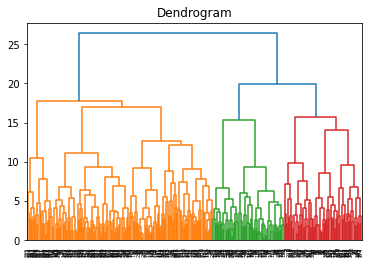

In [126]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram

Dendogram Single

In [123]:
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
Agg_hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'single')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset

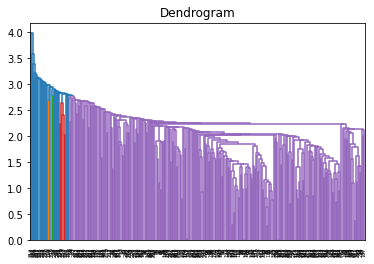

In [127]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method = 'single')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram

Dendogram Complete

In [128]:
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
Agg_hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset

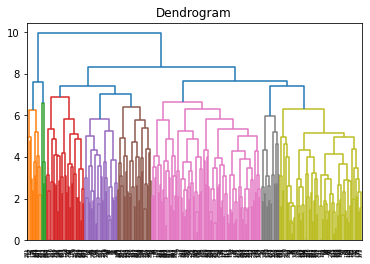

In [129]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method = 'complete')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram

Dendogram Average

In [130]:
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
Agg_hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset

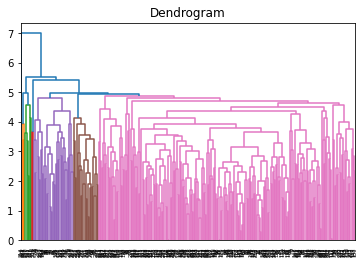

In [131]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method = 'average')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram

hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans

In [133]:
model = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
model.fit(df) 
labels = model.labels_
labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,